 Please run the JSON creators found in PreProcessing folder or download an example by runnnig the commeted code below

In [1]:
# from google_drive_downloader import GoogleDriveDownloader as gdd
# gdd.download_file_from_google_drive(file_id='1lDGIkS7QDy7mUDStDtb_fhMR5euF2R6v',dest_path='../resources/icepoints2019-02-08.json')
# gdd.download_file_from_google_drive(file_id='1qgePy_WsVN924fdJhnvcMpqCCRfvUC9i',dest_path='../resources/currentPoints.json')

In [2]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid

#read in IcePoints
icePoints = pd.read_json('../resources/icepoints2019-02-08.json')
icePoints = pd.DataFrame.from_records(icePoints.icepoints)

#read in CurrentPoints
currentPoints = pd.read_json('../resources/currentPoints.json')
currentPoints = pd.DataFrame.from_records(currentPoints.currentPoints)

ModuleNotFoundError: No module named 'RoutePlanner'

In [3]:
longMin    = 260
longMax    = 360
latMin     = -75
latMax     = -40
cellWidth  = 5
cellHeight = 2.5

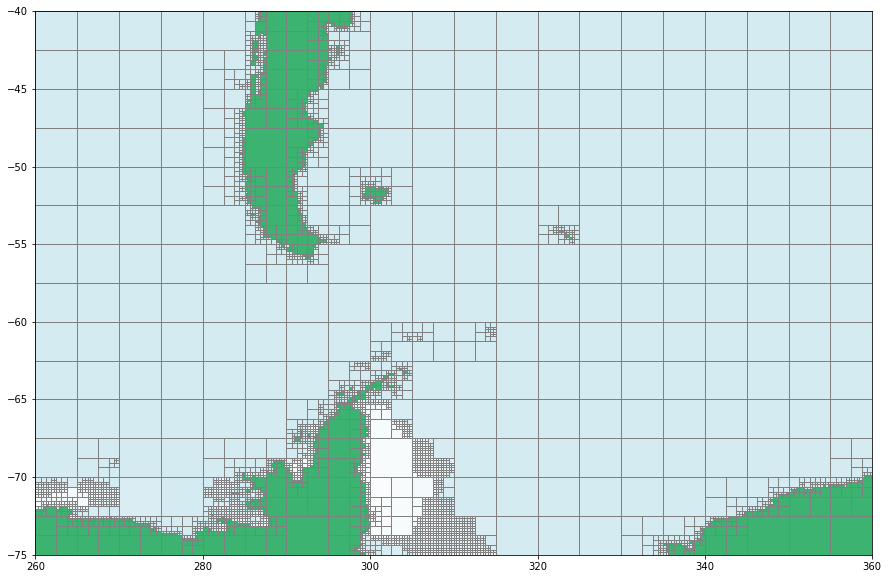

In [4]:
cellGrid = CellGrid(longMin, longMax, latMin, latMax, cellWidth, cellHeight)
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(4)
cellGrid.plot()

In [6]:
from RoutePlanner.Optimisation import TravelTime
OptInfo = {}
OptInfo['WayPoints']            = pd.read_csv('../resources/WayPoints.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3

In [7]:
TT = TravelTime(cellGrid,OptInfo)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = Falklands ===
=== Processing Waypoint = SouthGeorgia ===
=== Processing Waypoint = SouthSandwichTrench ===
=== Processing Waypoint = NorthPeninsula ===
=== Processing Waypoint = MaudRise ===
=== Processing Waypoint = CentralWeddellSea ===
=== Processing Waypoint = SouthOrkneyIslands ===
=== Processing Waypoint = CentralScotiaSea ===
=== Processing Waypoint = ArgentineSea ===
=== Processing Waypoint = BellingshausenSea ===
=== Processing Waypoint = MargueriteBay ===
=== Processing Waypoint = Palmer ===
=== Processing Waypoint = Brunt ===
=== Processing Waypoint = NorthernWeddellSea ===
=== Processing Waypoint = NorthWestGeorgiaRise ===
=== Processing Waypoint = ShagRocksPassage ===
=== Processing Waypoint = ElephantIsland ===
=== Processing Waypoint = BurdwoodBank ===
=== Processing Waypoint = A23bottom ===
=== Processing Waypoint = A23top ===
=== Processing Waypoint = SR4top ===
=== Processing Waypoint = SR4bottom ===
=== Processing Waypoint = OrkneyPassageEnt

<AxesSubplot:>

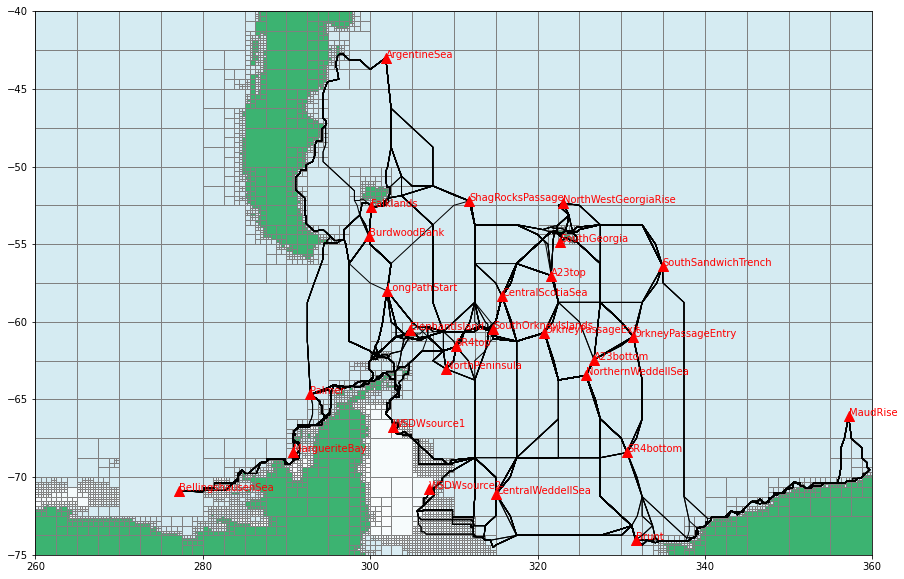

In [8]:
TT.PlotPaths()